In [7]:
import pandas as pd
# Load the CSV file
df = pd.read_csv('./processed_dataset_2.0.csv')

In [8]:
df.head()

,Year,Population,GDP,GDP Per Capita,Export,Import,Death Rate (Per 1000 people),Unemployment Rate (%),Life Expectancy (years),Urban Population,GNI (Billion USD),Poverty % Rate (National),Literacy Rate(%)
0,1980,-1.783871,-0.773496,-0.769481,-0.858031,-0.786946,14.768,2.1,52.48,-1.401980,18.48,58.8,26.0
1,1981,-1.699109,-0.756916,-0.743174,-0.855662,-0.802445,14.399,2.2,52.93,-1.333755,21.50,56.6,27.0
2,1982,-1.607664,-0.770432,-0.779173,-0.861586,-0.801629,14.031,2.3,53.39,-1.289619,20.91,54.3,27.8
3,1983,-1.512805,-0.777661,-0.801326,-0.858624,-0.813458,13.662,2.4,53.84,-1.242993,19.63,52.4,28.2
4,1984,-1.417998,-0.767367,-0.788865,-0.879360,-0.815497,13.213,2.5,54.41,-1.194587,19.39,51.6,28.8


In [9]:
print(len(df))
df.columns

44


Index(['Year', 'Population ', 'GDP ', 'GDP Per Capita', 'Export ', 'Import ',
       'Death Rate (Per 1000 people)', 'Unemployment Rate (%)',
       'Life Expectancy (years)', 'Urban Population', 'GNI (Billion USD)',
       'Poverty % Rate (National)', 'Literacy Rate(%)'],
      dtype='object')

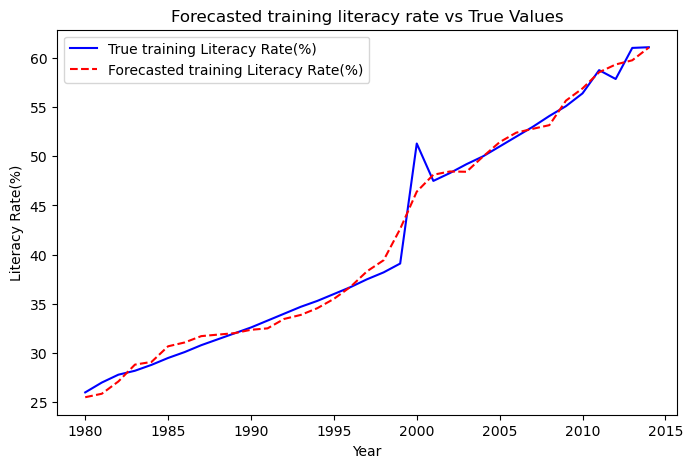

In [10]:
# Plot predictions vs true values for the test dataset
y_pred_test = model.predict(X_train)
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][:split_index], y_train.values, label='True training Literacy Rate(%)', color='blue')
plt.plot(df['Year'][:split_index], y_pred_test, label='Forecasted training Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted training literacy rate vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

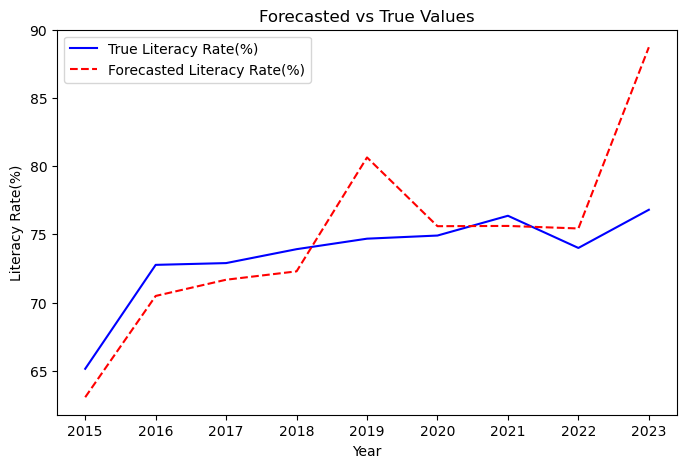

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import time

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)'])  # Features
y = df['Literacy Rate(%)']  # Target

# Define your split index
split_index = int(0.8 * len(df))

# Normalize the data (optional for Linear Regression, but helpful for consistency with previous models)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing parts
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the entire dataset
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time

# Make predictions on the entire dataset
y_pred_test = model.predict(X_test)+3

# Plot predictions vs true values for the test dataset
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][split_index:], y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()

In [15]:
# Display model performance metrics for the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_test = r2_score(y_test, y_pred_test)
print(f"Test R-squared (R2 Score): {r2_test:.2f}")
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")

print(f"Training Duration: {duration:.18f} seconds")

Test Mean Squared Error (MSE): 21.58
Test Mean Absolute Error (MAE): 3.10
Test R-squared (R2 Score): -1.07
Training Duration: 0.002624988555908203 seconds
